<center><h1> HDDM: Hierarchical Bayesian Estimation of the Drift Diffusion model</h1><p>
<h3>Thomas Wiecki</h3>
<h3>Former: PhD at Brown University</h3>
<h3>Current: Data Scientist at Quantopian Inc.</h3>

## Contents

* Installation
* Features
* First model
* Group-wise conditions
* Trial-by-trial effects
* Posterior predictive checks

## Why should you use it?

## *not* Frequentist.

<img src='not_probabilities.jpg'>

## It's hierarchical.

<img src="graphical_hddm.svg"/>

## Informative priors based on literature

<img src="hddm_info_priors.svg"/>

## ... all lead to better parameter recovery

<img src="http://www.frontiersin.org/files/Articles/55610/fninf-07-00014-HTML/image_m/fninf-07-00014-g006.jpg">

## Other reasons
* Heavily optimized likelihoods and samplers for speed and fast convergence.
* Trial-by-trial regressions allow estimation of influence of brain measures onto parameters.
* Free
* Open-source (BSD license)

## It's Roger Ratcliff approved


"We found that the hierarchical diffusion method [as implemented by HDDM] performed very well, and is the method of choice when the number of observations is small."<br>

Roger Ratcliff, grandfather of the DDM, in a paper comparing all available tools to do DDM analysis. </center>

## James Rowe (Cambridge University)

"The HDDM modelling gave insights into the effects of disease that were simply not visible from a traditional analysis of RT/Accuracy. It provides a clue as to why many disorders including PD and PSP can give the paradoxical combination of akinesia and impulsivity. Perhaps of broader interest, the hierarchical drift diffusion model turned out to be very robust. In separate work, we have found that the HDDM gave accurate estimates of decision parameters with many fewer than 100 trials, in contrast to the hundreds or even thousands one might use for ‘traditional’ DDMs. This meant it was realistic to study patients who do not tolerate long testing sessions."

## Installation

* Install the Anaconda Python distribution from Continuum. Available for all platforms.
* Type: `conda install -c pymc hddm`

## First steps

In [8]:
%matplotlib inline

## Importing the modules

In [7]:
import pandas as pd # Input, output and process tabular data
import matplotlib.pyplot as plt # Plotting
import hddm # Our toolbox
print(hddm.__version__)

0.6.0


### Loading data from csv

In [10]:
!head cavanagh_theta_nn.csv

subj_idx,stim,rt,response,theta,dbs,conf
0,LL,1.21,1.0,0.65627512226100004,1,HC
0,WL,1.6299999999999999,1.0,-0.32788867166199998,1,LC
0,WW,1.03,1.0,-0.480284512399,1,HC
0,WL,2.77,1.0,1.9274273452399999,1,LC
0,WW,1.1399999999999999,0.0,-0.21323572605999999,1,HC
0,WL,1.1499999999999999,1.0,-0.43620365940099998,1,LC
0,LL,2.0,1.0,-0.27447891439400002,1,HC
0,WL,1.04,0.0,0.66695707371400004,1,LC
0,WW,0.85699999999999998,1.0,0.11861689909799999,1,HC


### We use the ``hddm.load_csv()`` function to load this file.

In [11]:
data = hddm.load_csv('./cavanagh_theta_nn.csv')

### This is what it looks like

In [12]:
data.head(10)

,subj_idx,stim,rt,response,theta,dbs,conf
0,0,LL,1.210,1,0.656275,1,HC
1,0,WL,1.630,1,-0.327889,1,LC
2,0,WW,1.030,1,-0.480285,1,HC
3,0,WL,2.770,1,1.927427,1,LC
4,0,WW,1.140,0,-0.213236,1,HC
5,0,WL,1.150,1,-0.436204,1,LC
6,0,LL,2.000,1,-0.274479,1,HC
7,0,WL,1.040,0,0.666957,1,LC
8,0,WW,0.857,1,0.118617,1,HC
9,0,WL,1.500,0,0.823626,1,LC


### Plotting RT distributions

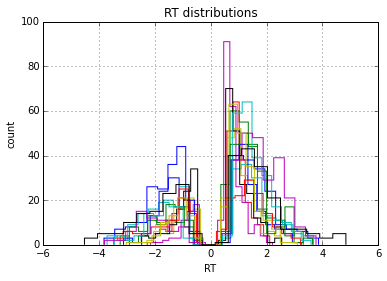

In [13]:
data = hddm.utils.flip_errors(data)

fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in data.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

### Fitting a hierarchical model

In [15]:
# Instantiate model object passing it our data (no need to call flip_errors() before passing it).
# This will tailor an individual hierarchical DDM around your dataset.
m = hddm.HDDM(data)

# find a good starting point which helps with the convergence.
m.find_starting_values()

# start drawing 7000 samples and discarding 5000 as burn-in
m.sample(2000, burn=20)

 [-----------------100%-----------------] 2000 of 2000 complete in 134.1 sec

## Generating summary statistics

In [19]:
m.gen_stats()

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,2.05904,0.105361,1.87169,1.99271,2.05434,2.11792,2.27806,0.00304391
a_std,0.379705,0.089028,0.251971,0.315687,0.363579,0.425209,0.597847,0.00268493
a_subj.0,2.38202,0.0587249,2.27155,2.34003,2.3807,2.42333,2.49948,0.00160586
a_subj.1,2.12929,0.0626968,2.01081,2.08506,2.12721,2.1724,2.25442,0.00229291
a_subj.2,1.74864,0.0477797,1.66005,1.7169,1.74791,1.77903,1.84503,0.00136548
a_subj.3,2.25106,0.0611559,2.13436,2.21099,2.24943,2.29118,2.37246,0.00170204
a_subj.4,1.49046,0.0466729,1.40563,1.45815,1.48809,1.52118,1.5838,0.00159797
a_subj.5,1.77033,0.050684,1.67549,1.73451,1.76913,1.80394,1.8708,0.00147958
a_subj.6,1.61237,0.0445744,1.53049,1.58249,1.61005,1.64127,1.70375,0.00125384
a_subj.7,1.87552,0.0501358,1.78021,1.83923,1.87467,1.91037,1.97411,0.00135142


## Plotting the posterior

Plotting a
Plotting a_std
Plotting v
Plotting t


/home/wiecki/miniconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


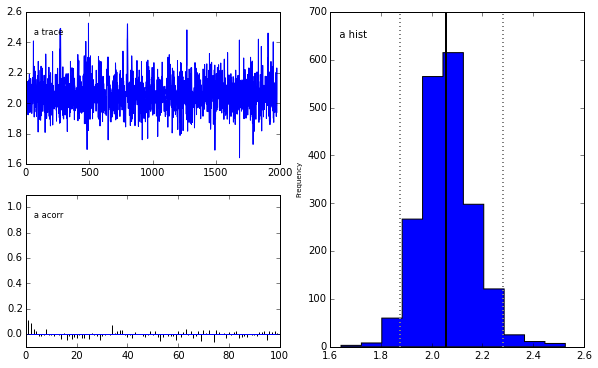

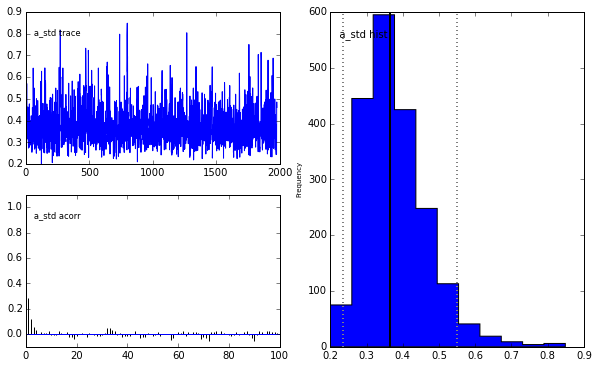

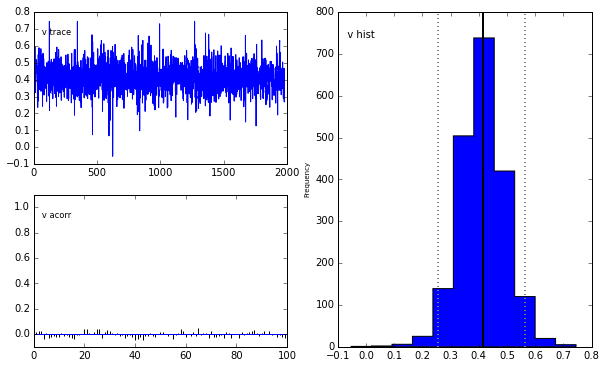

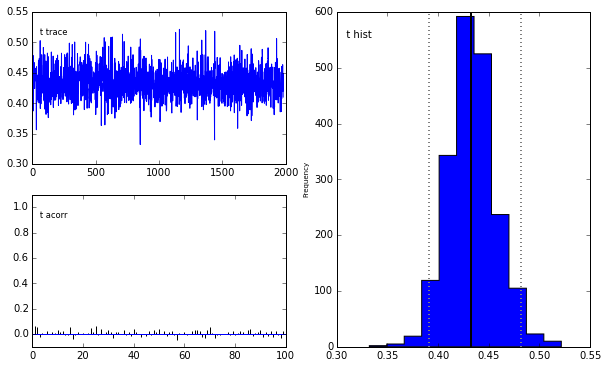

In [20]:
m.plot_posteriors(['a', 't', 'v', 'a_std'])

## How well does model fit data? -> Posterior predictive plot

/home/wiecki/miniconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


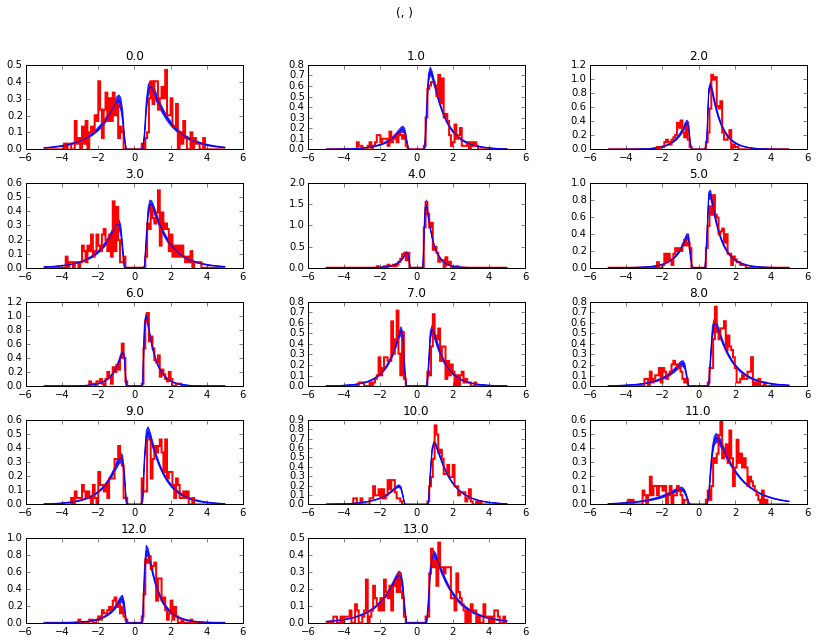

In [21]:
m.plot_posterior_predictive(figsize=(14, 10))

## Defining conditions with `depends_on`

In [5]:
m_stim = hddm.HDDM(data, depends_on={'v': 'stim'})
m_stim.find_starting_values()
m_stim.sample(10000, burn=1000)

 [-----------------100%-----------------] 10001 of 10000 complete in 880.2 sec

## Comparing drift-rates across conditions

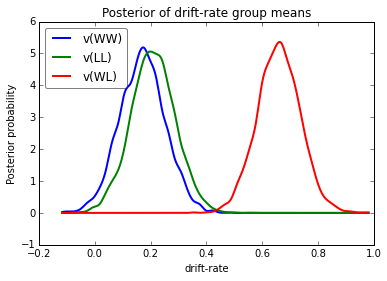

In [6]:
v_WW, v_LL, v_WL = m_stim.nodes_db.node[['v(WW)', 'v(LL)', 'v(WL)']]
hddm.analyze.plot_posterior_nodes([v_WW, v_LL, v_WL])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means')

## Hypothesis testing

In [7]:
print("P(WW > LL) = ", (v_WW.trace() > v_LL.trace()).mean())
print("P(LL > WL) = ", (v_LL.trace() > v_WL.trace()).mean())

P(WW > LL) =  0.363666666667
P(LL > WL) =  0.0


## Model comparison using DIC
### (lower is better)

In [8]:
print("Lumped model DIC: %f" % m.dic)
print("Stimulus model DIC: %f" % m_stim.dic)

Lumped model DIC: 10961.119944
Stimulus model DIC: 10775.345611


## Within-subject effects

## Specify a glm using R-like syntax with `patsy`

In [9]:
from patsy import dmatrix
dmatrix("C(stim, Treatment('WL'))", data.head(10))

DesignMatrix with shape (10, 3)
  Intercept  C(stim, Treatment('WL'))[T.LL]  C(stim, Treatment('WL'))[T.WW]
          1                               1                               0
          1                               0                               0
          1                               0                               1
          1                               0                               0
          1                               0                               1
          1                               0                               0
          1                               1                               0
          1                               0                               0
          1                               0                               1
          1                               0                               0
  Terms:
    'Intercept' (column 0)
    "C(stim, Treatment('WL'))" (columns 1:3)

## Pass glm-descriptor to `HDDMRegressor`

In [10]:
m_within_subj = hddm.HDDMRegressor(data, "v ~ C(stim, Treatment('WL'))")

Adding these covariates:
['v_Intercept', "v_C(stim, Treatment('WL'))[T.LL]", "v_C(stim, Treatment('WL'))[T.WW]"]


In [11]:
m_within_subj.sample(5000, burn=200)

 [-----------------100%-----------------] 5000 of 5000 complete in 2448.6 sec

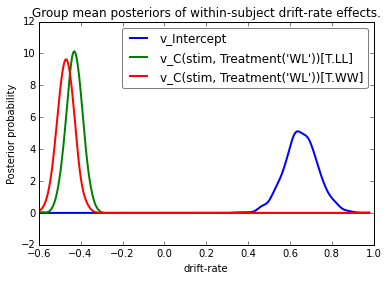

In [12]:
v_WL, v_LL, v_WW = m_within_subj.nodes_db.ix[["v_Intercept", 
                                              "v_C(stim, Treatment('WL'))[T.LL]", 
                                              "v_C(stim, Treatment('WL'))[T.WW]"], 'node']
hddm.analyze.plot_posterior_nodes([v_WL, v_LL, v_WW])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Group mean posteriors of within-subject drift-rate effects.')

## Fitting regression models

For more information, see http://ski.clps.brown.edu/papers/Cavanagh_DBSEEG.pdf

In [13]:
m_reg = hddm.HDDMRegressor(data[data.dbs == 0], 
                           "a ~ theta:C(conf, Treatment('LC'))", 
                           depends_on={'v': 'stim'})

Adding these covariates:
['a_Intercept', "a_theta:C(conf, Treatment('LC'))[HC]", "a_theta:C(conf, Treatment('LC'))[LC]"]


In [14]:
m_reg.sample(5000, burn=200)

 [-----------------100%-----------------] 5001 of 5000 complete in 3897.9 sec

P(a_theta < 0) =  0.02375


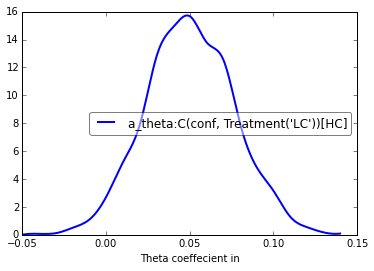

In [16]:
theta = m_reg.nodes_db.node["a_theta:C(conf, Treatment('LC'))[HC]"]
hddm.analyze.plot_posterior_nodes([theta], bins=20)
plt.xlabel('Theta coeffecient in ')
print("P(a_theta < 0) = ", (theta.trace() < 0).mean())

## Outliers are a fact of life

In [23]:
outlier_data, params = hddm.generate.gen_rand_data(params={'a': 2, 't': .4, 'v': .5}, 
                                                   size=200, n_fast_outliers=10)

/home/wiecki/working/projects/hddm/hddm/generate.py:431: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  outliers.rt[:n_fast] = np.random.rand(n_fast) * (min(abs(data['rt'])) - 0.1001)  + 0.1001


In [23]:
m_no_outlier = hddm.HDDM(outlier_data)
m_no_outlier.sample(2000, burn=50)

 [-----------------100%-----------------] 2000 of 2000 complete in 7.7 sec

## Fit is strongly affected, especially by fast outliers

/home/wiecki/miniconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


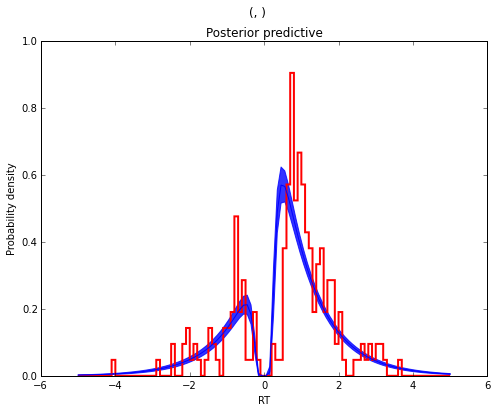

In [24]:
m_no_outlier.plot_posterior_predictive()
plt.title('Posterior predictive')
plt.xlabel('RT')
plt.ylabel('Probability density')
plt.savefig('hddm_demo_fig_10.pdf')

## Robustness to outliers with `p_outlier`

In [25]:
m_outlier = hddm.HDDM(outlier_data, p_outlier=.05)
m_outlier.sample(2000, burn=20)

 [-----------------100%-----------------] 2000 of 2000 complete in 6.7 sec

/home/wiecki/miniconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


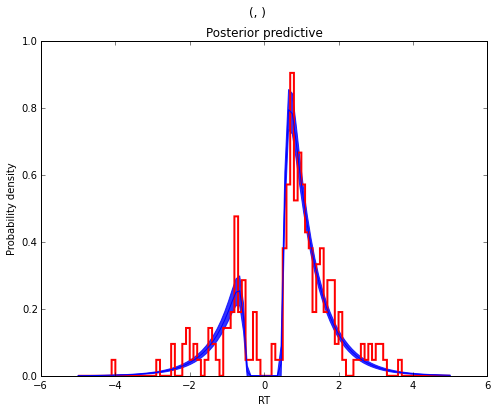

In [26]:
m_outlier.plot_posterior_predictive()
plt.title('Posterior predictive')
plt.xlabel('RT')
plt.ylabel('Probability density')
plt.savefig('hddm_demo_fig_11.pdf')


# Questions?

## Links

* Documentation: [http://ski.clps.brown.edu/hddm_docs/](http://ski.clps.brown.edu/hddm_docs/)
* Code: https://github.com/hddm-devs/hddm